In [1]:
from pyspark.mllib.linalg import Vectors
from pyspark.mllib.regression import LabeledPoint

from pyspark.mllib.tree import GradientBoostedTrees, GradientBoostedTreesModel
from pyspark.mllib.tree import RandomForest, RandomForestModel

from pyspark.mllib.util import MLUtils

%pylab inline

import numpy as np
from time import time

import sys,os,pickle
sys.path.insert(0, os.path.abspath('../src'))

from BoostStumps import *

Populating the interactive namespace from numpy and matplotlib


In [44]:
from pyspark import SparkContext

#sc=SparkContext()

from numpy.random import rand
p=1
data=[]
size=10
print '   '+''.join(["%2.0f "%i for i in range(size)])
for i in range(size):
    print "%2.0f "%i,
    for j in range(size):
        if np.abs(i-size/4)<size/5 and np.abs(j-size/2)<size/5:
            y=2*(rand()<p)-1
        else:
            y=2*(rand()>p)-1
        print "%1.0f "%((1+y)/2),
        data.append(LabeledPoint(y,[i,j]))
    print

    0  1  2  3  4  5  6  7  8  9 
 0  0  0  0  0  0  0  0  0  0  0 
 1  0  0  0  0  1  1  1  0  0  0 
 2  0  0  0  0  1  1  1  0  0  0 
 3  0  0  0  0  1  1  1  0  0  0 
 4  0  0  0  0  0  0  0  0  0  0 
 5  0  0  0  0  0  0  0  0  0  0 
 6  0  0  0  0  0  0  0  0  0  0 
 7  0  0  0  0  0  0  0  0  0  0 
 8  0  0  0  0  0  0  0  0  0  0 
 9  0  0  0  0  0  0  0  0  0  0 


In [58]:
data

[LabeledPoint(-1.0, [0.0,0.0]),
 LabeledPoint(-1.0, [0.0,1.0]),
 LabeledPoint(-1.0, [0.0,2.0]),
 LabeledPoint(-1.0, [0.0,3.0]),
 LabeledPoint(-1.0, [0.0,4.0]),
 LabeledPoint(-1.0, [0.0,5.0]),
 LabeledPoint(-1.0, [0.0,6.0]),
 LabeledPoint(-1.0, [0.0,7.0]),
 LabeledPoint(-1.0, [0.0,8.0]),
 LabeledPoint(-1.0, [0.0,9.0]),
 LabeledPoint(-1.0, [1.0,0.0]),
 LabeledPoint(-1.0, [1.0,1.0]),
 LabeledPoint(-1.0, [1.0,2.0]),
 LabeledPoint(-1.0, [1.0,3.0]),
 LabeledPoint(1.0, [1.0,4.0]),
 LabeledPoint(1.0, [1.0,5.0]),
 LabeledPoint(1.0, [1.0,6.0]),
 LabeledPoint(-1.0, [1.0,7.0]),
 LabeledPoint(-1.0, [1.0,8.0]),
 LabeledPoint(-1.0, [1.0,9.0]),
 LabeledPoint(-1.0, [2.0,0.0]),
 LabeledPoint(-1.0, [2.0,1.0]),
 LabeledPoint(-1.0, [2.0,2.0]),
 LabeledPoint(-1.0, [2.0,3.0]),
 LabeledPoint(1.0, [2.0,4.0]),
 LabeledPoint(1.0, [2.0,5.0]),
 LabeledPoint(1.0, [2.0,6.0]),
 LabeledPoint(-1.0, [2.0,7.0]),
 LabeledPoint(-1.0, [2.0,8.0]),
 LabeledPoint(-1.0, [2.0,9.0]),
 LabeledPoint(-1.0, [3.0,0.0]),
 LabeledPoint(

In [45]:
dataRDD=sc.parallelize(data,numSlices=2)
dataRDD.getNumPartitions()

2

In [46]:
sc

In [47]:
booster=Booster(sc,dataRDD,no_of_bins=20)

label counts in data: [(-1.0, 91), (1.0, 9)]
number of features= 2 number of partitions= 2
Sizes: Data=100, trainingData=65, testData=35
number of elements in GR= 2
number of elements in GTR= 2
number of partitions in PS= 2


In [48]:
#print booster.report_times()

In [49]:
Scores=[]
for i in range(10):
    booster.boosting_iteration()
    print booster.compute_errors()
    Scores.append(booster.compute_margins())

(0.076923076923076927, 0.11428571428571428)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)


In [50]:
#print booster.report_times()

In [51]:
prev_best=-1
for i in range(len(booster.proposals)):
    iteration_data=booster.proposals[i]
    best_feature=iteration_data['best feature']
    print '-'*50,i,best_feature
    if prev_best>-1:
        print 'corr of prev best',iteration_data['details'][prev_best]['SS'][prev_best_threshold_index]
    print best_feature,iteration_data['details'][best_feature]
    prev_best=best_feature
    prev_best_threshold_index=iteration_data['details'][prev_best]['Threshold_index']

-------------------------------------------------- 0 1
1 {'SS': array([ 1.        ,  1.        ,  0.67741935,  0.48387097,  0.48387097,
        0.29032258,  0.16129032,  0.16129032, -0.09677419, -0.29032258,
       -0.29032258, -0.5483871 , -0.5483871 , -0.74193548, -0.87096774, -1.        ]), 'Correlation': 1.0, 'Threshold': 0.0, 'alpha': inf, 'Feature_index': 1, 'Threshold_index': 0}
-------------------------------------------------- 1 0
corr of prev best nan
0 {'SS': array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan]), 'Correlation': nan, 'Threshold': 0.0, 'alpha': nan, 'Feature_index': 0, 'Threshold_index': 0}
-------------------------------------------------- 2 0
corr of prev best nan
0 {'SS': array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan]), 'Correlation': nan, 'Threshold': 0.0, 'alpha': nan, 'Feature_index': 0, 'Threshold_index': 0}
---------------

In [ ]:
print booster.proposals

In [52]:
booster.Strong_Classifier

[{'Correlation': 1.0,
  'Feature_index': 1,
  'SS': array([ 1.        ,  1.        ,  0.67741935,  0.48387097,  0.48387097,
          0.29032258,  0.16129032,  0.16129032, -0.09677419, -0.29032258,
         -0.29032258, -0.5483871 , -0.5483871 , -0.74193548, -0.87096774, -1.        ]),
  'Threshold': 0.0,
  'Threshold_index': 0,
  'alpha': inf},
 {'Correlation': nan,
  'Feature_index': 0,
  'SS': array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan,  nan,  nan,  nan,  nan,  nan]),
  'Threshold': 0.0,
  'Threshold_index': 0,
  'alpha': nan},
 {'Correlation': nan,
  'Feature_index': 0,
  'SS': array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan,  nan,  nan,  nan,  nan,  nan]),
  'Threshold': 0.0,
  'Threshold_index': 0,
  'alpha': nan},
 {'Correlation': nan,
  'Feature_index': 0,
  'SS': array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
          nan,  nan,  nan,  nan,  nan,  nan]),
  'Threshold':

In [56]:
trainScores=[]
for train,test in Scores:
    trainScores.append(train.flatMap(lambda A:list(A)).collect())
len(trainScores)

10

In [57]:
scoresArray=np.stack(trainScores)
shape(scoresArray)

(10, 65)

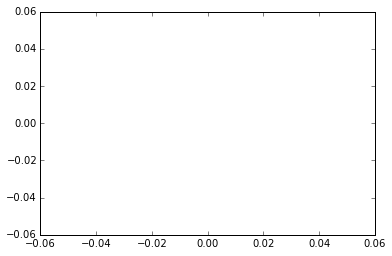

In [55]:
plot(scoresArray);

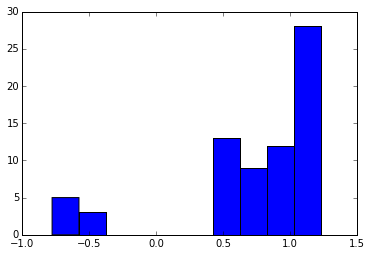

In [43]:
hist(scoresArray[9,:]);